In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats

In [2]:
df = pd.read_csv('application_train.csv')

In [3]:
#checking columns list
df.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [4]:
#getting dataframe with only suspected essential columns
df = df[[
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'ORGANIZATION_TYPE']]

In [5]:
#remove column with more than 40% missing values
for i in df.columns:
    if df[i].isna().sum()/len(df.index) > 0.4:
        df.drop(i, axis=1)

In [6]:
#remove XNA in df
for i in df.columns:
    df = df[df[i] != 'XNA']

In [7]:
#check df len after remove xna
len(df)

252133

<AxesSubplot: xlabel='TARGET', ylabel='count'>

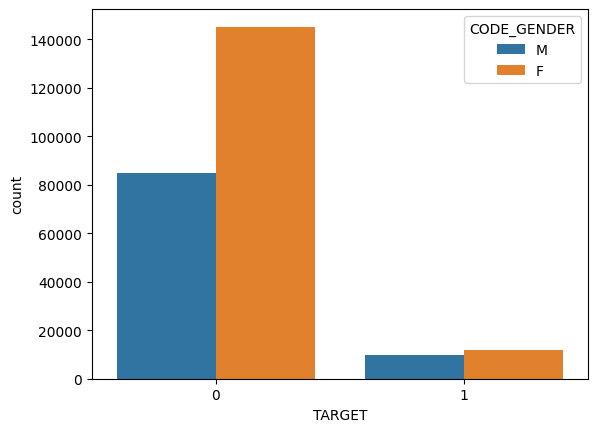

In [8]:
#see gender relation with target
sns.countplot(x='TARGET',hue='CODE_GENDER',data=df)

In [9]:
#remove outlier in income
df = df[(df['AMT_INCOME_TOTAL'] > df['AMT_INCOME_TOTAL'].quantile(0.1)) & 
        (df['AMT_INCOME_TOTAL'] < df['AMT_INCOME_TOTAL'].quantile(0.9))]

<AxesSubplot: xlabel='TARGET', ylabel='AMT_INCOME_TOTAL'>

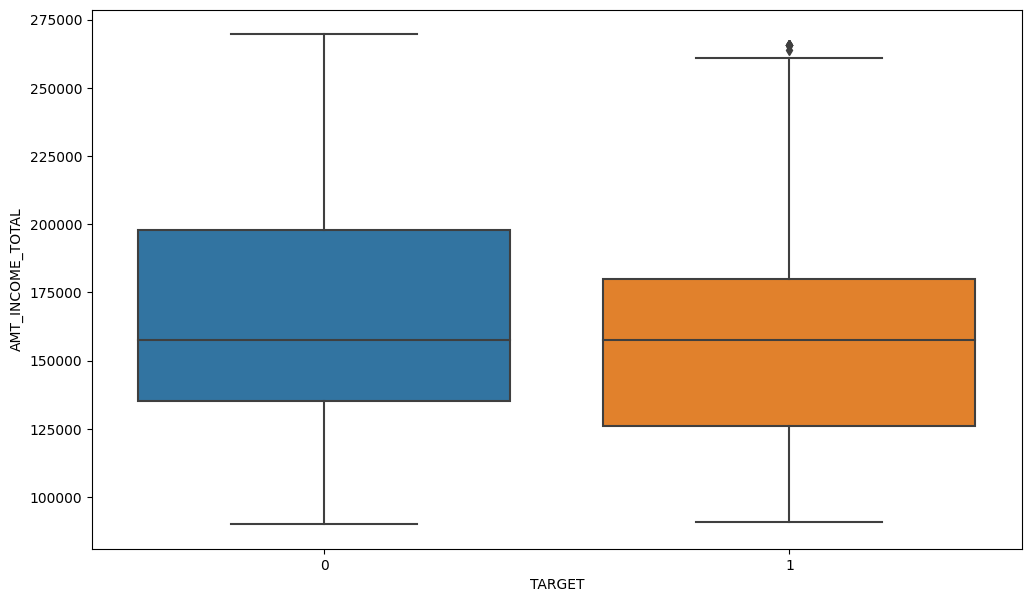

In [10]:
#check relation between target and income
plt.figure(figsize=(12, 7))
sns.boxplot(x='TARGET',y='AMT_INCOME_TOTAL',data=df)

In [11]:
#check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178036 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       178036 non-null  int64  
 1   NAME_CONTRACT_TYPE           178036 non-null  object 
 2   CODE_GENDER                  178036 non-null  object 
 3   FLAG_OWN_CAR                 178036 non-null  object 
 4   FLAG_OWN_REALTY              178036 non-null  object 
 5   CNT_CHILDREN                 178036 non-null  int64  
 6   AMT_INCOME_TOTAL             178036 non-null  float64
 7   AMT_CREDIT                   178036 non-null  float64
 8   AMT_ANNUITY                  178027 non-null  float64
 9   AMT_GOODS_PRICE              177888 non-null  float64
 10  NAME_INCOME_TYPE             178036 non-null  object 
 11  NAME_EDUCATION_TYPE          178036 non-null  object 
 12  NAME_FAMILY_STATUS           178036 non-null  object 
 13 

In [12]:
#encode categorical data
label1 = LabelEncoder()
df['NAME_CONTRACT_TYPE'] = label1.fit_transform(df['NAME_CONTRACT_TYPE'])
df['CODE_GENDER'] = label1.fit_transform(df['CODE_GENDER'])
df['FLAG_OWN_CAR'] = label1.fit_transform(df['FLAG_OWN_CAR'])
df['FLAG_OWN_REALTY'] = label1.fit_transform(df['FLAG_OWN_REALTY'])
df['OCCUPATION_TYPE'] = label1.fit_transform(df['OCCUPATION_TYPE'])
df['ORGANIZATION_TYPE'] = label1.fit_transform(df['ORGANIZATION_TYPE'])
df['NAME_INCOME_TYPE'] = label1.fit_transform(df['NAME_INCOME_TYPE'])
df['NAME_EDUCATION_TYPE'] = label1.fit_transform(df['NAME_EDUCATION_TYPE'])
df['NAME_FAMILY_STATUS'] = label1.fit_transform(df['NAME_FAMILY_STATUS'])
df['NAME_HOUSING_TYPE'] = label1.fit_transform(df['NAME_HOUSING_TYPE'])

In [13]:
df.isnull().sum().sum()

158

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum().sum()

0

In [16]:
#split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('TARGET',axis=1), df['TARGET'], test_size=0.2)

In [17]:
#start training using logistic regression
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [18]:
#evaluate model using accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9090679109512031

In [19]:
#evaluate model  using roc auc
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, logmodel.decision_function(X_train))

0.6088466106779875

In [20]:
#start training using SGDClassifier
from sklearn.linear_model import SGDClassifier

logmodel2 = SGDClassifier()
logmodel2.fit(X_train,y_train)
predictions2 = logmodel2.predict(X_test)

In [21]:
#evaluate model using accuracy
accuracy_score(y_test, predictions2)

0.9090116932763661

In [22]:
#evaluate model  using roc auc
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, logmodel2.decision_function(X_train))

0.5710995693674324

In [23]:
df_test = pd.read_csv('application_test.csv')

In [25]:
df_test = df_test.apply(LabelEncoder().fit_transform)
df_test = df_test[[
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'ORGANIZATION_TYPE']]

In [33]:
pred_test1 = logmodel.predict(df_test)

In [34]:
pred_test2 = logmodel2.predict(df_test)

In [35]:
np.unique(pred_test1, return_counts=True)

(array([1], dtype=int64), array([48744], dtype=int64))

In [36]:
np.unique(pred_test2, return_counts=True)

(array([1], dtype=int64), array([48744], dtype=int64))